In [1]:
import numpy as np
import pandas as pd
import datetime
import os
from collections import OrderedDict
from pathlib import Path
import uuid
import pydicom

import cv2
import matplotlib.pyplot as plt

import gzip

# mimic-cxr should have two subfolders:
#   files/ - with MIMIC-CXR DICOMs
#   jpg/files/ - with MIMIC-CXR-JPG JPG files
mimic_cxr_path = Path('/db/mimic-cxr')

In [2]:
# load the record list
df = pd.read_csv(mimic_cxr_path / 'cxr-record-list.csv.gz', header=0, sep=',')



fn = df.iloc[0]['path']
dicom_path = mimic_cxr_path / fn

with open(dicom_path, 'rb') as fp:
    plan = pydicom.read_file(fp, stop_before_pixels=False)

# load in JPG
jpg_path = (mimic_cxr_path / 'jpg') / (fn[:-4] + '.jpg')
img = cv2.imread(str(jpg_path), 0)

=== files/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.dcm ===


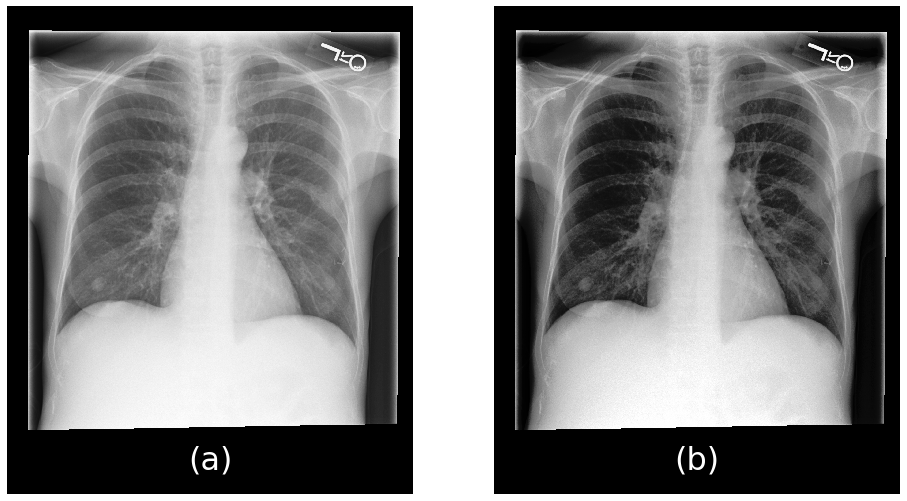

In [3]:
# annotate the figure with subfigure caption
text_kwargs = {'color': 'w', 'fontsize': 32, 'fontweight': 4, 'ha': 'center'}
yloc = 2900

print(f'=== {fn} ===')
ax = plt.figure(figsize=[16, 10]).subplots(1, 2)

# DICOM image
ax[0].imshow(plan.pixel_array, cmap='gray')

xloc = np.mean(ax[0].get_xlim())
ax[0].text(xloc, yloc, '(a)', **text_kwargs)
ax[0].axis('off')

# JPG image
ax[1].imshow(img, cmap='gray')

xloc = np.mean(ax[1].get_xlim())
ax[1].text(xloc, yloc, '(b)', **text_kwargs)
ax[1].axis('off')
plt.savefig('dicom2jpg.jpg', bbox_inches='tight')
plt.show()